## Coursera Recommender System Project

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Coursera.csv")
df.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [3]:
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 3522 rows and 7 columns in the dataset.


In [4]:
# get the null values
df.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

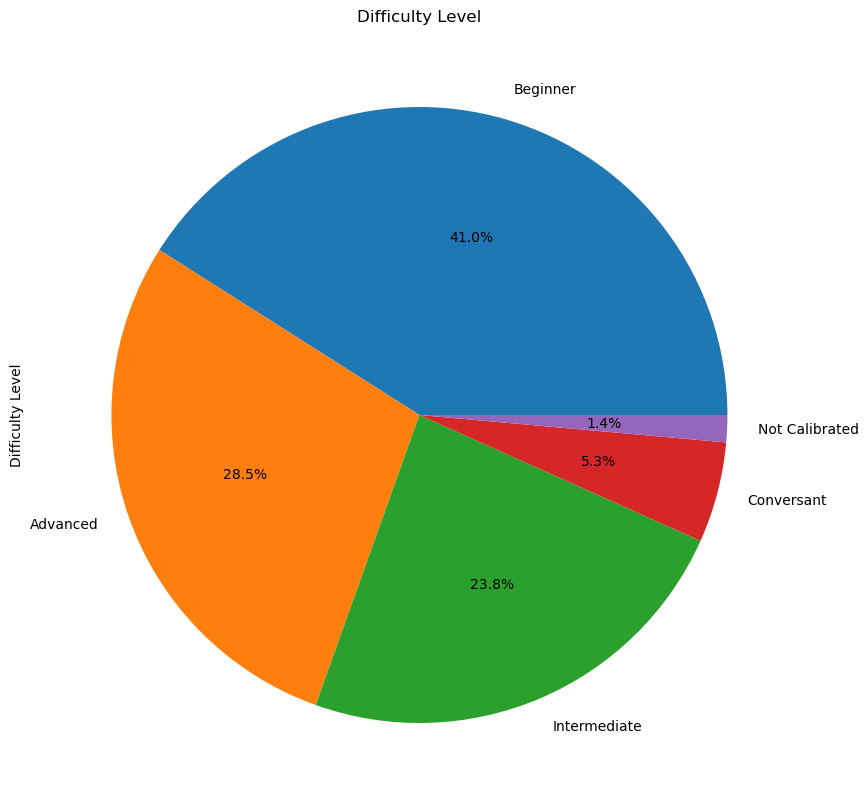

In [5]:
# get a pie chart of the Difficulty Level
df['Difficulty Level'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10, 10))
plt.title('Difficulty Level')
plt.show()


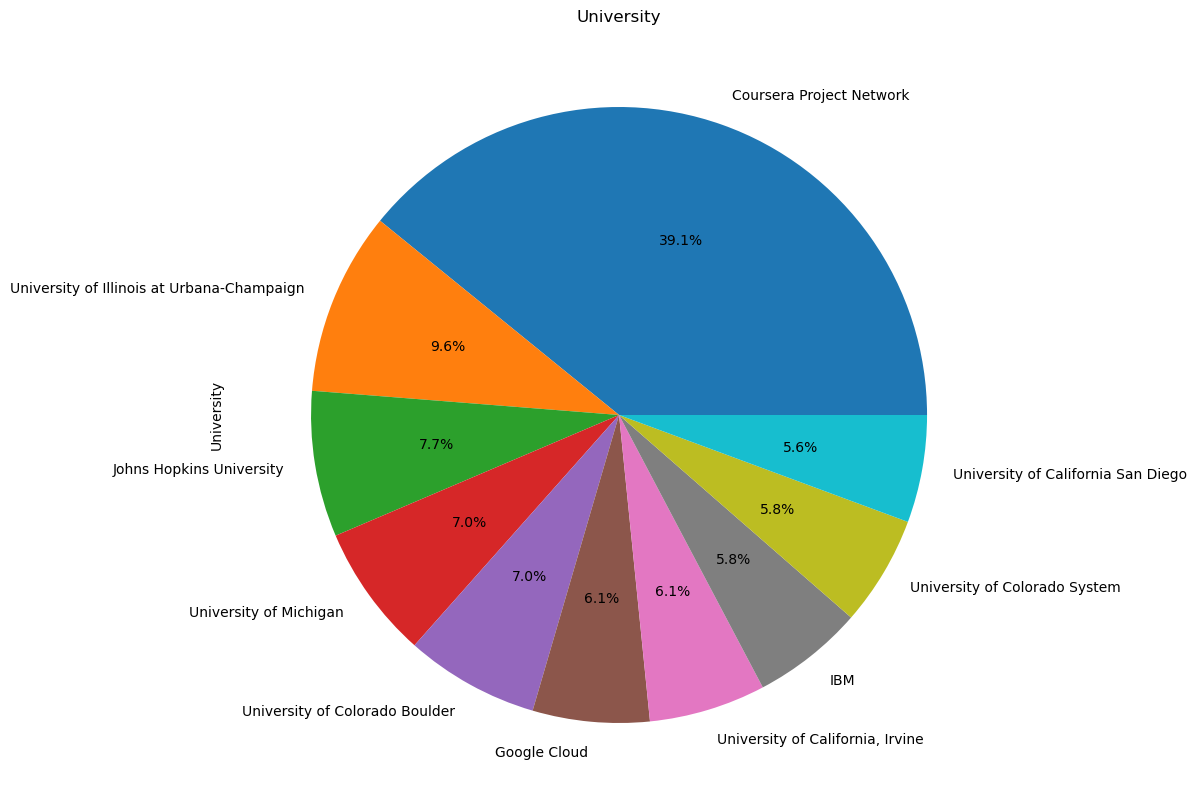

In [6]:
df['University'].value_counts().head(10).plot.pie(autopct='%1.1f%%', figsize=(10, 10))
plt.title('University')
plt.show()

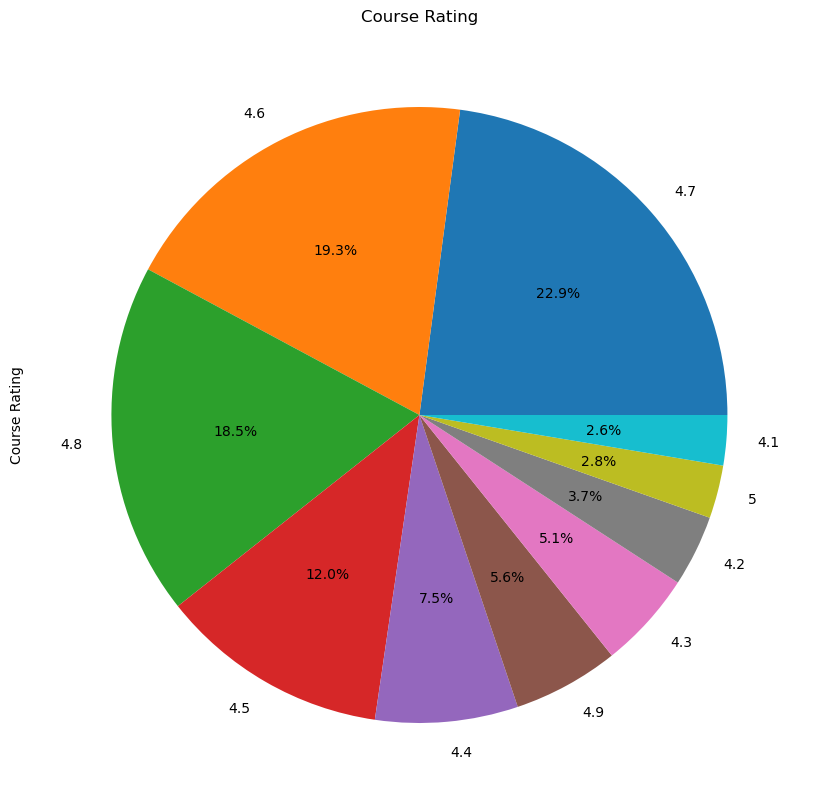

In [7]:
df['Course Rating'].value_counts().head(10).plot.pie(autopct='%1.1f%%', figsize=(10, 10))
plt.title('Course Rating')
plt.show()

In [8]:
data = df[['Course Name','Difficulty Level','Course Description','Skills',]]
# make the data into one hot encoding
data = pd.get_dummies(data, columns=['Difficulty Level'])
data.head(5)
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset.")

There are 3522 rows and 8 columns in the dataset.


In [9]:
data = df[['Course Name','Difficulty Level','Course Description','Skills', 'Course Rating']]
# combine the course description and skills
data['Info'] = data['Difficulty Level'] + data['Course Description'] + data['Skills']
# drop the skills column
data = data.drop(['Skills'], axis=1)
data.drop(columns=['Course Description'], inplace=True)
data.drop(columns=['Difficulty Level'], inplace=True)
data.head()


/var/folders/_1/lp5kp6tj2lsd_ry1fksy95kc0000gn/T/ipykernel_11262/2599917051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Info'] = data['Difficulty Level'] + data['Course Description'] + data['Skills']


,Course Name,Course Rating,Info
0,Write A Feature Length Screenplay For Film Or ...,4.8,BeginnerWrite a Full Length Feature Film Scrip...
1,Business Strategy: Business Model Canvas Analy...,4.8,"BeginnerBy the end of this guided project, you..."
2,Silicon Thin Film Solar Cells,4.1,AdvancedThis course consists of a general pres...
3,Finance for Managers,4.8,"IntermediateWhen it comes to numbers, there is..."
4,Retrieve Data using Single-Table SQL Queries,4.6,BeginnerIn this course you�ll learn how to eff...


In [15]:
data.to_csv('Coursera_cleaned.csv')

## Recommender System

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Extract features from the text using TF-IDF vectorization
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(data['Info'])

# Compute the cosine similarity matrix
cosine_similarities = cosine_similarity(text_features)

# Define a function to get recommendations based on a given course name
def get_recommendations(title, n=10):
    # Get the index of the the course name: i.e., Python Programming Essentials is in the 16th row
    idx = df[df['Course Name'] == title].index[0]

    # Cosine similarity scores with the provided course (a total of data.shape[0] values)
    sim_scores = list(enumerate(cosine_similarities[idx])) # enumerate provides the index and the value and making it to a list

    # Sort the courses based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # with the largest similarity score in a descending order

    # Get the top n most similar movies (excluding the movie itself)
    top_scores = sim_scores[1:n+1] # exclude the first one because the first one is the course itself
    top_indices = [i[0] for i in top_scores] # get a list of index of the top scores
    return df.iloc[top_indices]['Course Name']


In [11]:
[i for i in data['Course Name'].unique()]

['Write A Feature Length Screenplay For Film Or Television',
 'Business Strategy: Business Model Canvas Analysis with Miro',
 'Silicon Thin Film Solar Cells',
 'Finance for Managers',
 'Retrieve Data using Single-Table SQL Queries',
 'Building Test Automation Framework using Selenium and TestNG',
 'Doing Business in China Capstone',
 'Programming Languages, Part A',
 'The Roles and Responsibilities of Nonprofit Boards of Directors within the Governance Process',
 'Business Russian Communication. Part 3',
 'Agile Projects:  Developing Tasks with Taiga',
 'Esports Management Capstone Project',
 'Hacking and Patching',
 'Business Statistics and Analysis Capstone',
 'Grab Data Fast with Vertical and Horizontal LOOKUP',
 'Global Health: An Interdisciplinary Overview',
 'Python Programming Essentials',
 'Creating Dashboards and Storytelling with Tableau',
 'Parallel programming',
 'Recommendation Systems with TensorFlow on GCP',
 'The Changing Arctic',
 'COVID-19 - A clinical update',
 'How 

In [12]:
get_recommendations('Finance for Managers')

708     Understanding Financial Statements: Company Po...
1839    Fundamentals of financial and management accou...
1891          Accounting and Finance for IT professionals
1985                  Introduction to Finance: The Basics
1808                       Accounting for Decision Making
1860     Create a Financial Statement using Google Sheets
1090                    Financial Accounting Fundamentals
419                    Finance for Non-Financial Managers
1126                    Financial Accounting: Foundations
2829       Accounting: Principles of Financial Accounting
Name: Course Name, dtype: object

In [13]:
df[df['Course Name'] == 'Python Programming Essentials'].index[0]
len(cosine_similarities[16]) # it has the cosine similarity with all the courses
len(cosine_similarities[16])  == data.shape[0]
top10 = sorted(list(enumerate(cosine_similarities[16])), key=lambda x: x[1], reverse=True)[1:11]
top_indices = [i[0] for i in top10]
df.iloc[top_indices]['Course Name']

740                           Python Data Representations
2329                                 Python Data Analysis
2039                       Python for Data Science and AI
2518                       Python for Data Science and AI
2519                       Python for Data Science and AI
2886                       Python for Data Science and AI
3242    An Introduction to Interactive Programming in ...
1871                                        Python Basics
1000                               Crash Course on Python
747             Python Functions, Files, and Dictionaries
Name: Course Name, dtype: object

In [14]:
df['Course Description']
# save the data into a text file
with open('data.txt', 'w') as f:
    for item in df['Course Description']:
        f.write(item)
        # write a new line
        f.write("\n")
